In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("D:\code\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

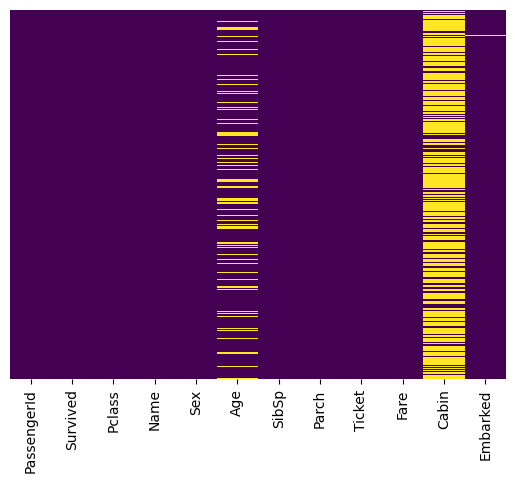

In [10]:
sns.heatmap(df.isnull(),yticklabels=False , cbar = False , cmap= 'viridis')

## Fillout all missing valus or handle it


In [11]:
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\sidd7\AppData\Local\Temp\ipykernel_2824\1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

C:\Users\sidd7\AppData\Local\Temp\ipykernel_2824\1718695086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## not needed features 

In [15]:
## removing the PassengerID , Name , Ticket 
df.drop(['Name' , 'Ticket' , 'PassengerId'], axis = 1 , inplace = True)

In [16]:
## removing the cabing feature also beacuse it has to many null valus 
df.drop('Cabin', axis = 1 , inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
## pie chart for Survived featurs
survived_vl = df['Survived'].value_counts().values

In [20]:
survived_index = df['Survived'].value_counts().index

([<matplotlib.patches.Wedge at 0x1845f955ed0>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, ' 61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, ' 38.38%')])

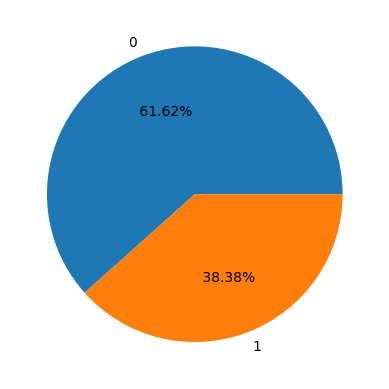

In [21]:
plt.pie(survived_vl,labels=survived_index ,  autopct= '% 1.2f%%')

# Sex(gender) column

In [22]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
GS = df.groupby(['Sex','Survived']).size().reset_index(name='Count')

In [24]:
GS

,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


<Axes: xlabel='Sex', ylabel='Count'>

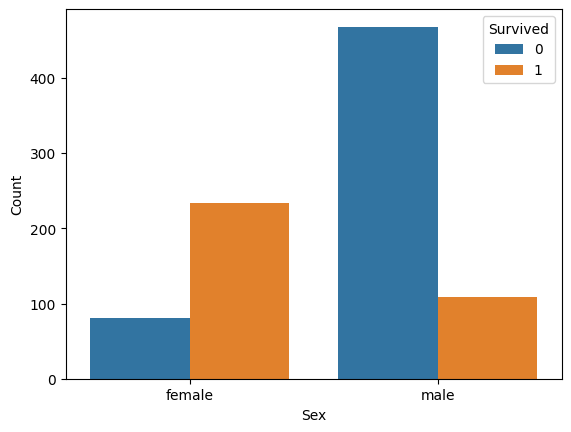

In [25]:
sns.barplot(x='Sex', y='Count', hue='Survived', data=GS)

<Axes: xlabel='Sex', ylabel='Survived'>

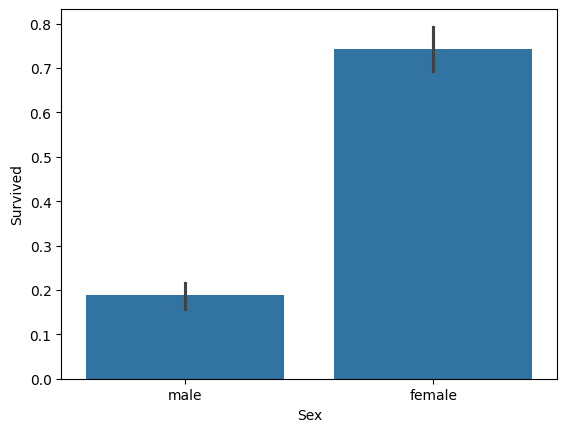

In [26]:
sns.barplot(x='Sex', y='Survived', data=df)

In [27]:
from scipy.stats import chi2_contingency

Hypotheses:
 1.  Null Hypothesis (H0): There is no significant relation between sex and survival status.

 2.  Alternative Hypothesis (H1): There is an significant relation sex and survival status.


In [28]:
count_table = pd.crosstab(df['Sex'], df['Survived'])

chi_stat, p_value, dof, expected = chi2_contingency(count_table)

print("Chi-Square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relation between sex and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relation between sex and Survived.")

Chi-Square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies:
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
Reject the null hypothesis: There is a significant relation between sex and Survived.


Insight : From this hypothesis and graph we can say that sex(gender) played a significant role to check whether a passenger is survived or not. For example, we can say that females had a higher survival rate compared to males, it may be due to social norms and rescue priorities favoring women and children.

In [29]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
## Pclass pie chart
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
Pclass_v = df['Pclass'].value_counts().values
Pclass_in = df['Pclass'].value_counts().index

([<matplotlib.patches.Wedge at 0x1845f869d80>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, ' 55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, ' 24.24%'),
  Text(0.47809698854500815, -0.3625234744733013, ' 20.65%')])

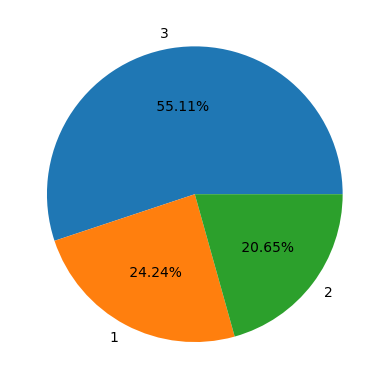

In [32]:
plt.pie(Pclass_v,labels=Pclass_in ,  autopct= '% 1.2f%%')

In [33]:
PS = df.groupby(['Pclass','Survived']).size().reset_index(name='PSCount')

In [34]:
PS

,Pclass,Survived,PSCount
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


<Axes: xlabel='Pclass', ylabel='PSCount'>

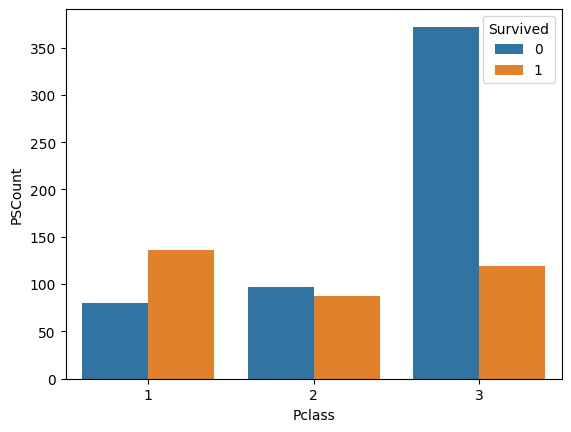

In [35]:
sns.barplot(x = 'Pclass', y = 'PSCount', hue= 'Survived' , data = PS)

<Axes: xlabel='Pclass', ylabel='Survived'>

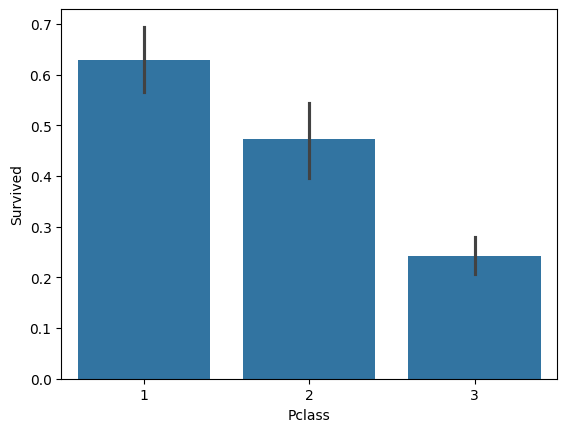

In [36]:
sns.barplot(x = 'Pclass', y = 'Survived',data= df)

Hypotheses:
 1.  Null Hypothesis (H0): There is no significant association between passenger class and survival status.
 2.  Alternative Hypothesis (H1): There is an significant association between passenger class and survival status

In [37]:
count_table = pd.crosstab(df['Pclass'], df['Survived'])

In [38]:
count_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


obs:

1. 80 passengers in 1st class did not survive, while 136 did.
2. 97 passengers in 2nd class did not survive, while 87 did.
3. 372 passengers in 3rd class did not survive, while 119 did.

In [39]:
chi_stat, p_value, dof, expected = chi2_contingency(count_table)

print("Chi-Square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Pclass and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Pclass and Survived.")

Chi-Square Statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
Reject the null hypothesis: There is a significant association between Pclass and Survived.


In [40]:
PS_gender = df.groupby(['Sex','Pclass','Survived']).size().reset_index(name='PSCount')

In [41]:
PS_gender

,Sex,Pclass,Survived,PSCount
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72
6,male,1,0,77
7,male,1,1,45
8,male,2,0,91
9,male,2,1,17


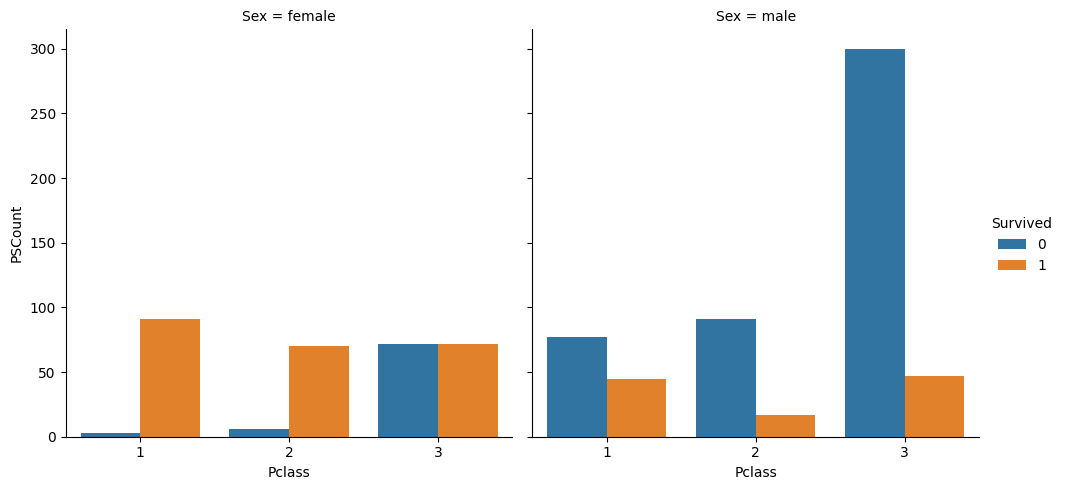

In [42]:
g = sns.catplot(
    data=PS_gender,
    x='Pclass',
    y='PSCount',
    hue='Survived',
    col='Sex',
    kind='bar',
)


# SibSp

In [43]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [44]:
sibsp_v = df['SibSp'].value_counts().values
sibsp_in = df['SibSp'].value_counts().index

([<matplotlib.patches.Wedge at 0x18460e73850>,
 [Text(-0.596335425299201, 0.9243289785207544, '0'),
  Text(0.33770481176055295, -1.0468789137783652, '1'),
  Text(1.0029980041727713, -0.45165806051197366, '2'),
  Text(1.0627689715338293, -0.28376418580385865, '4'),
  Text(1.089077888508049, -0.15462649437547848, '3'),
  Text(1.0980245143543599, -0.06589511269337359, '8'),
  Text(1.0998290643754833, -0.019391471190945954, '5')],
 [Text(-0.3252738683450187, 0.5041794428295023, ' 68.24%'),
  Text(0.18420262459666523, -0.5710248620609264, ' 23.46%'),
  Text(0.5470898204578751, -0.24635894209744014, ' 3.14%'),
  Text(0.5796921662911796, -0.15478046498392287, ' 2.02%'),
  Text(0.5940424846407539, -0.08434172420480643, ' 1.80%'),
  Text(0.5989224623751053, -0.035942788741840134, ' 0.79%'),
  Text(0.5999067623866272, -0.010577166104152338, ' 0.56%')])

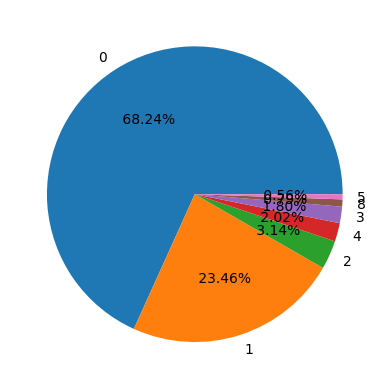

In [45]:
plt.pie(sibsp_v, labels= sibsp_in , autopct='% 1.2f%%')

In [46]:
sib_sur = df.groupby(['SibSp','Survived']).size().reset_index(name='SibCount')

In [47]:
sib_sur

,SibSp,Survived,SibCount
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


<Axes: xlabel='SibSp', ylabel='SibCount'>

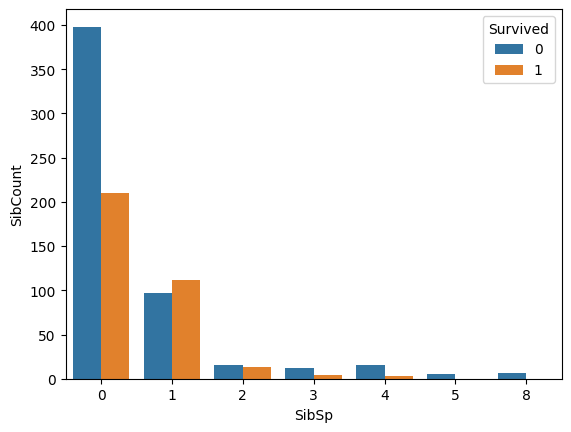

In [48]:
sns.barplot(x = 'SibSp' , y = 'SibCount' , hue='Survived', data = sib_sur )

<Axes: xlabel='SibSp', ylabel='Survived'>

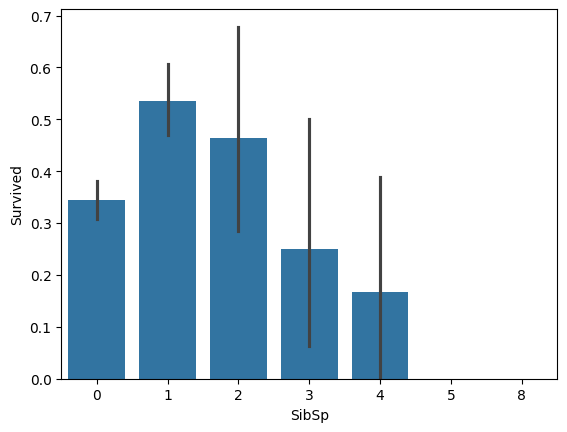

In [49]:
sns.barplot(x='SibSp', y='Survived', data=df)

observation 

1  here we can see that those who are solo and not come with their siblings or with their Spouses their survived rate is low 
2  those who are come in pair of 2 their survived rate is high.

Null Hypothesis (H₀) : 
There is no significant relationship between the number of sibsp aboard (Parch) and survival.

Alternative Hypothesis (H₁) : 
There is a significant relationship between the number of sibsp aboard (Parch) and survival 

In [50]:
contingency_table = pd.crosstab(df['SibSp'], df['Survived'])

chi_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between SibSp and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between SibSp and Survived.")

Chi-Square Statistic: 37.2717929152043
P-value: 1.5585810465902147e-06
Degrees of Freedom: 6
Expected Frequencies:
[[374.62626263 233.37373737]
 [128.77777778  80.22222222]
 [ 17.25252525  10.74747475]
 [  9.85858586   6.14141414]
 [ 11.09090909   6.90909091]
 [  3.08080808   1.91919192]
 [  4.31313131   2.68686869]]
Reject the null hypothesis: There is a significant relationship between SibSp and Survived.


In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# parch

In [52]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [53]:
parch_v = df['Parch'].value_counts().values
parch_in = df['Parch'].value_counts().index

([<matplotlib.patches.Wedge at 0x18461046140>,
 [Text(-0.824161635214429, 0.7285311242772533, '0'),
  Text(0.5691360355501764, -0.9413204412091711, '1'),
  Text(1.0438350803048508, -0.34699902755622514, '2'),
  Text(1.0998251580326444, -0.019611776015164274, '5')],
 [Text(-0.44954271011696123, 0.39738061324213814, ' 76.96%'),
  Text(0.31043783757282345, -0.5134475133868206, ' 13.39%'),
  Text(0.5693645892571912, -0.18927219684885008, ' 9.08%'),
  Text(0.5999046316541696, -0.010697332371907784, ' 0.57%')])

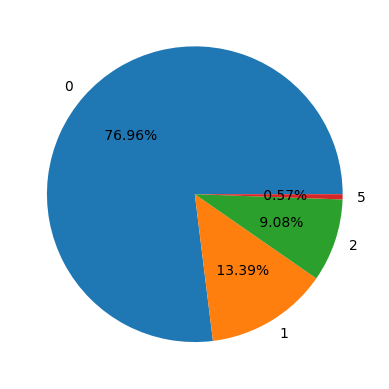

In [54]:
plt.pie(parch_v[:4] , labels= parch_in[:4] , autopct= '% 1.2f%%')

In [55]:
parch_sur = df.groupby(['Parch','Survived']).size().reset_index(name='CountP')

In [56]:
parch_sur

,Parch,Survived,CountP
0,0,0,445
1,0,1,233
2,1,0,53
3,1,1,65
4,2,0,40
5,2,1,40
6,3,0,2
7,3,1,3
8,4,0,4
9,5,0,4


<Axes: xlabel='Parch', ylabel='CountP'>

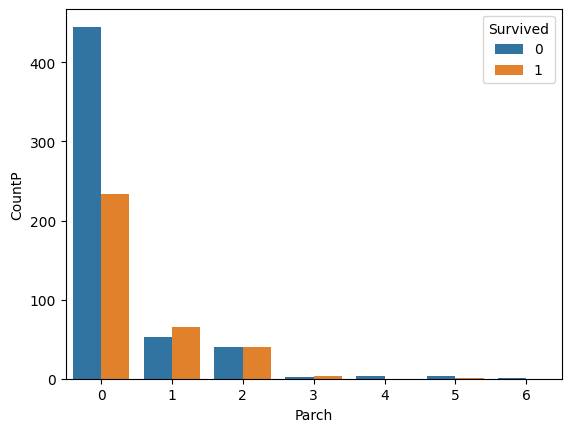

In [57]:
sns.barplot(x = 'Parch' , y = 'CountP' , hue='Survived', data = parch_sur )

<Axes: xlabel='Parch', ylabel='Survived'>

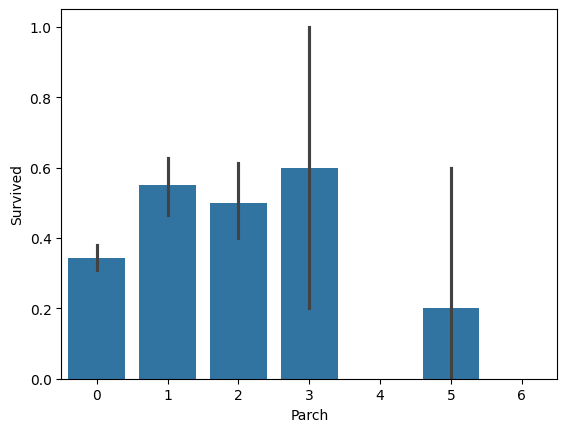

In [58]:
sns.barplot(x='Parch', y='Survived', data=df)

Null Hypothesis (H₀) : 
There is no significant relationship between the number of parents/children aboard (Parch) and survival.

Alternative Hypothesis (H₁) : 
There is a significant relationship between the number of parents/children aboard (Parch) and survival 

In [59]:
contingency_table = pd.crosstab(df['Parch'], df['Survived'])

chi_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Parch and Survived.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Parch and Survived.")

Chi-Square Statistic: 27.925784060236168
P-value: 9.703526421039996e-05
Degrees of Freedom: 6
Expected Frequencies:
[[4.17757576e+02 2.60242424e+02]
 [7.27070707e+01 4.52929293e+01]
 [4.92929293e+01 3.07070707e+01]
 [3.08080808e+00 1.91919192e+00]
 [2.46464646e+00 1.53535354e+00]
 [3.08080808e+00 1.91919192e+00]
 [6.16161616e-01 3.83838384e-01]]
Reject the null hypothesis: There is a significant relationship between Parch and Survived.


In [60]:
from scipy.stats import kruskal

In [61]:
kruskal_statistic, p_val = kruskal(df['Parch'], df['Survived'])

print(f"KW Statistic: {kruskal_statistic}")
print(f"p-value: {p_val}")

if p_val < 0.05:
    print("Reject null hypothesis. There's a statistically significant association between Parch and survival")
else:
    print("Fail to reject null hypothesis. There's no statistically significant association between parch and survival")
                    

KW Statistic: 21.953669422614464
p-value: 2.7931234613958967e-06
Reject null hypothesis. There's a statistically significant association between Parch and survival


# fare

In [62]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

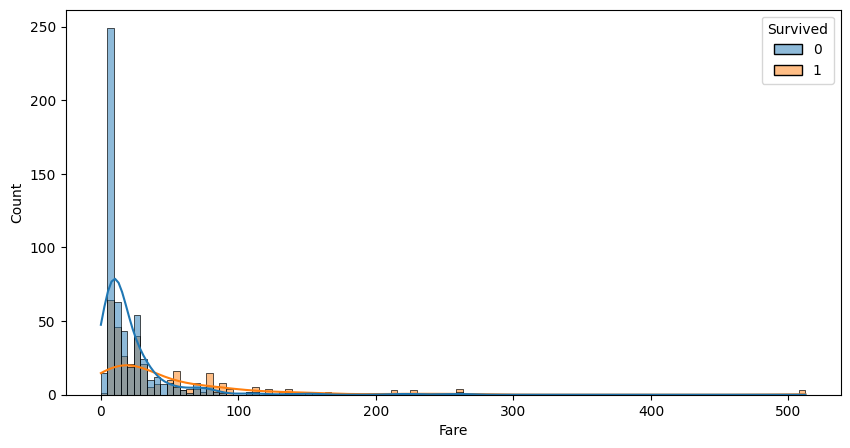

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Fare', hue='Survived', kde=True, element='bars' , data=df)

#Null Hypothesis (H₀) : 
The null hypothesis states that there is no significant difference in the mean Fare between survivors and non-survivors.

#Alternative Hypothesis (H₁) : 
The alternative hypothesis states that there is a significant difference in the mean Fare between survivors and non-survivors.

In [64]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

t_stat, p_value = ttest_ind(fare_survived, fare_not_survived)

print(t_stat)
print(p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean Fare between survivors and non-survivors.")

7.939191660871055
6.120189341924198e-15
Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors.


Null Hypothesis (H0) : 
There is no significant difference in the mean fare between survivors and non-survivors for passengers who paid less than $50.

Alternative Hypothesis (H1) : 
There is a significant difference in the mean fare between survivors and non-survivors for passengers who paid less than $50

In [65]:
fare_survived = df[df['Survived'] == 1 & (df['Fare'] < 50)]['Fare']
fare_not_survived = df[df['Survived'] == 0 & (df['Fare'] < 50)]['Fare']

t_stat, p_value = ttest_ind(fare_survived, fare_not_survived)

print(t_stat)
print(p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors for who paid less than 50$. ")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean fare between survivors and non-survivors for who paid less than 50$.")

3.997791449645891
6.961544252085827e-05
Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors for who paid less than 50$. 


Insights : There chould be other factors than fare played a role in survival for this specific fare group.

All pclass(1,2,3) passengers were in this group, on the basis of pclass, chances of survived in 1 class is more then other.

Passengers with lower fares might have had a smaller social network onboard, affecting access to help during the disaster.




Null Hypothesis (H0) : 
There is no significant difference in the mean fare between survivors and non-survivors for passengers who paid between $50 to $300.

Alternative Hypothesis (H1) : 
There is a significant difference in the mean fare between survivors and non-survivors for passengers who paid between $50 to $300.

In [66]:
fare_survived = df[df['Survived'] == 1 & (df['Fare'] > 50) & (df['Fare'] <= 300)]['Fare']
fare_not_survived = df[df['Survived'] == 0 & (df['Fare'] > 50) & (df['Fare'] <= 300)]['Fare']

t_stat, p_value = ttest_ind(fare_survived, fare_not_survived)

print(t_stat)
print(p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors for who paid between $50 to $300.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean Fare between survivors and non-survivors for who paid between $50 to $300.")

3.5282207908045495
0.00043485640213962825
Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors for who paid between $50 to $300.


Passengers with higher fares within this range might have belonged to a higher cabin class(Easy access to lifeboats)



Null Hypothesis (H0) : 
There is no significant difference in the mean fare between survivors and non-survivors for passengers who paid more than $300.

Alternative Hypothesis (H1) : 
There is a significant difference in the mean fare between survivors and non-survivors for passengers who paid more than $300

In [67]:
fare_survived = df[df['Survived'] == 1 & (df['Fare'] > 300)]['Fare']
fare_not_survived = df[df['Survived'] == 0 & (df['Fare'] > 300)]['Fare']

t_stat, p_value = ttest_ind(fare_survived, fare_not_survived)

print(t_stat)
print(p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Fare between survivors and non-survivors for who paid more then $300")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean Fare between survivors and non-survivors for who paid more then $300")

1.0931406906944239
0.2745715841478826
Fail to reject the null hypothesis: There is no significant difference in the mean Fare between survivors and non-survivors for who paid more then $300


In this group there no significant difference, This is more likely due to the limited sample size in this group. Passengers with very high fares would be a small group, making it difficult to detect a true difference with statistical significance.


<Axes: xlabel='Pclass', ylabel='Fare'>

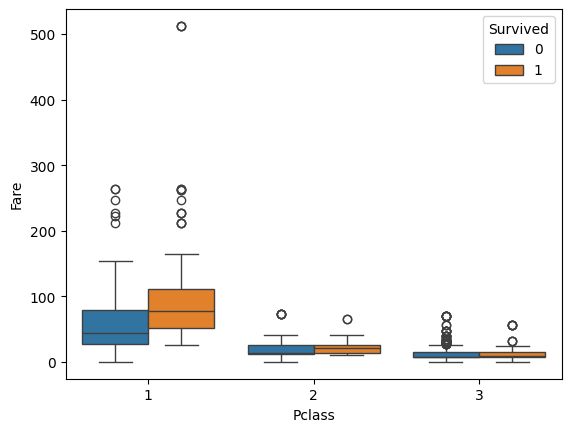

In [68]:
sns.boxplot(x='Pclass', y='Fare', hue= 'Survived', data=df)

Null Hypothesis (H0):
1. There is no significant main effect of fare on survival rate
2. There is no significant main effect of passenger class (Pclass) on survival rate 
3. There is no significant interaction effect between fare and Pclass on survival rate



Alternative Hypothesis (H1) : 
1. Fare has a significant effect on survival rate
2. Passenger class has a significant effect on survival rate.
3. There is a significant interaction effect between fare and Pclass on survival rate.


In [69]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [70]:
model = ols('Survived ~ Fare + Pclass + Fare:Pclass', data=df).fit()

anova_table = anova_lm(model, typ=2)

print(anova_table)


                 sum_sq     df          F        PR(>F)
Fare           1.535151    1.0   7.358527  6.803812e-03
Pclass        11.726505    1.0  56.209326  1.578704e-13
Fare:Pclass    0.001466    1.0   0.007029  9.332046e-01
Residual     185.047756  887.0        NaN           NaN


## Age

<Axes: xlabel='Age'>

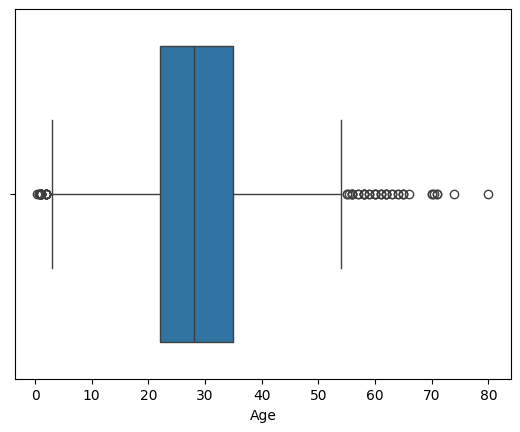

In [71]:
## Age columne
sns.boxplot(x =df['Age'])


<Axes: xlabel='Survived', ylabel='Age'>

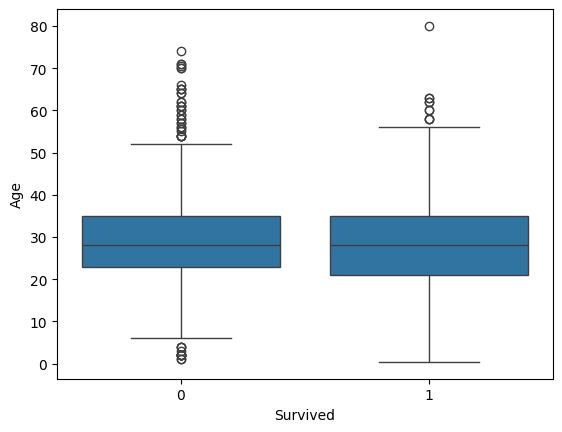

In [72]:
sns.boxplot(x='Survived', y='Age', data=df)


#observation:
younger people those are in their 22 to 36 they survived more.
and in non survived we can mostly old people are their and childerns are there and also young people are also but old are more

Null Hypothesis (H₀) : 
there is no significant difference in the mean age between survivors and non-survivors.

Alternative Hypothesis (H₁) : 
there is a significant difference in the mean age between survivors and non-survivors

In [73]:
age_survived = df[df['Survived'] == 1]['Age']
age_not_survived = df[df['Survived'] == 0]['Age']

t_stat, p_value = ttest_ind(age_survived, age_not_survived)

print(t_stat)
print(p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean Age between survivors and non-survivors.")

-1.9394659179476366
0.0527606884758555
Fail to reject the null hypothesis: There is no significant difference in the mean Age between survivors and non-survivors.


Insight :  From this we can say that age is not a importent factor to check whether passengr is survived or not. Their are other factors which have imp role in survivle rate ex - class , fare. 

## handling the categorical features

In [74]:
## For Gender 
df['Sex'] = df['Sex'].map({'female':1 , 'male': 0})

In [75]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S


In [76]:
## for Embaeked (here we are do OHE)
df= pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [77]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [79]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


## Appling Classification Model

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 40  )

In [84]:
len(X_train),len(X_test),len(y_test),len(y_train)

(712, 179, 179, 712)

In [85]:
y_test.value_counts()

Survived
0    103
1     76
Name: count, dtype: int64

In [86]:
y_train.value_counts()

Survived
0    446
1    266
Name: count, dtype: int64

In [87]:
mdl = RandomForestClassifier(n_estimators=100, random_state = 40)

In [88]:
mdl.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [89]:
y_pred = mdl.predict(X_test)

In [90]:
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.79      0.72      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [92]:
print(confusion_matrix(y_test,y_pred))

[[88 15]
 [21 55]]


In [93]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [94]:
cv_scores = cross_val_score(mdl, X, y, cv=5)
y_pred = cross_val_predict(mdl, X, y, cv=5)

In [95]:
print(accuracy_score(y, y_pred))

0.8002244668911336


In [96]:
print(confusion_matrix(y, y_pred))

[[466  83]
 [ 95 247]]


In [97]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.72      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



## K Fold CV

In [98]:
from sklearn.model_selection import KFold, cross_val_score

In [99]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scoress = cross_val_score(mdl, X, y, cv=kf, scoring='accuracy')

In [100]:

print(f'K-Fold Cross-Validation Accuracy Scores: {cv_scoress}')
print(f'Mean Accuracy: {cv_scoress.mean():.4f}')

K-Fold Cross-Validation Accuracy Scores: [0.80446927 0.78651685 0.83707865 0.79775281 0.82022472]
Mean Accuracy: 0.8092
